In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
%matplotlib inline

In [3]:
def line(x, y, a, b, c):
    return a*x + b*y + c

def line_color(line_func, *x, random_coef = 0.):
    if line_func(*x) + random_coef * (np.random.rand(1) - 0.5) >= 0:
        return 1
    return 0

In [71]:
# let there be data
N = 150
X = np.random.rand(N, 2)
y = np.empty(N)

L = lambda x, y: line(x, y, a = 1.2, b = 0.8, c = -1)

for i in range(N):
    y[i] = line_color(L, *X[i], random_coef = 1)

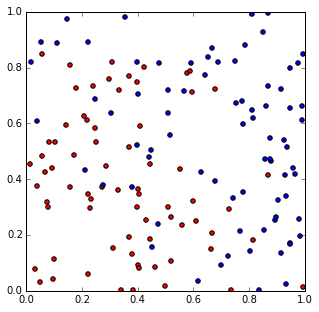

In [72]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
ax.set(aspect = 1., xlim = (0,1), ylim = (0,1))
X_0 = np.array([X[i] for i, c in enumerate(y) if c == 0])
X_1 = np.array([X[i] for i, c in enumerate(y) if c == 1])
_tmp = ax.scatter(X_0[:,0], X_0[:,1], c = "red")
_tmp = ax.scatter(X_1[:,0], X_1[:,1], c = "blue")

In [73]:
import sklearn.cross_validation as cv

In [74]:
X_train, X_test, y_train, y_test = cv.train_test_split(X, y, train_size = 0.8)
N_train = len(y_train)
N_test = len(y_test)

In [75]:
import sklearn.linear_model as linear_model

In [76]:
log_regr_model = linear_model.LogisticRegression()
log_regr_model.fit(X_train, y_train)
log_regr_pred = log_regr_model.predict(X_test)
log_regr_score = np.mean(log_regr_pred == y_test)

In [83]:
import sklearn.naive_bayes as naive_bayes

In [84]:
nb_model = naive_bayes.GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_score = np.mean(nb_pred == y_test)

In [78]:
import sklearn.neighbors as neighbors

In [81]:
scores_knn = []
for k in range(1, 15):
    knn_model = neighbors.KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train, y_train)
    knn_pred = knn_model.predict(X_test)
    knn_score = np.mean(knn_pred == y_test)
    scores_knn.append((k, knn_score))

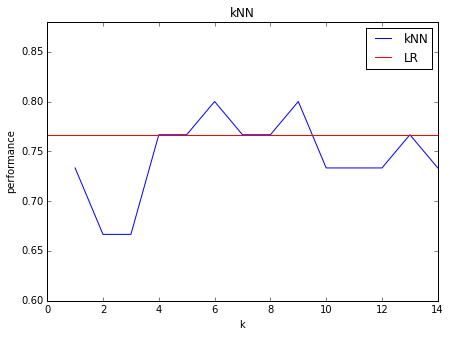

In [86]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))
xx = [e[0] for e in scores_knn]
yy = [e[1] for e in scores_knn]
ax.set(title = 'kNN', xlabel = 'k', ylabel = 'performance')
ax.set(ylim = (0.9 * min(log_regr_score, nb_score, min(yy)),
               1.1 * max(log_regr_score, nb_score, max(yy))))
_tmp = ax.plot(xx, yy, color = "blue", label = "kNN")
_tmp = ax.plot((0, max(xx)), (log_regr_score, log_regr_score),
               color = "red", label = "LR")
_tmp = ax.legend()